# Simulation of two electron spins in a double quantum dot

In [1]:
from sympy import Piecewise
from sympy import sqrt
from sympy import Eq
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.constants import h
from scipy.constants import electron_volt as eV
import time
%matplotlib inline

### Introduction
$\newcommand{\ket}[1]{|#1\rangle}$

The Hamiltonian of spin qubits in double quantum dots are modelled by the generalized Hubbard model [3].

\begin{align}
H = H_{\mu} + H_{t} + H_{U} + H_{Z}
\end{align}

Where the chemical potential part is $H_{\mu} = \displaystyle\sum_{i\sigma}(-\mu_in_{i\sigma})$ and the hopping terms are $H_t = \displaystyle\sum_{<ij>\sigma}(-tc_{i\sigma}^{\dagger}c_{j\sigma})$. The coulomb repulsion terms are $H_U = \displaystyle\sum_i U_in_{i\uparrow}n_{i\downarrow}$ and the zeeman term is $H_Z=\displaystyle\sum_{i}h_{i}(n_{i\uparrow}-n_{i\downarrow})$



In this notebook a few examples of the Hamiltonian in the 2 electron basis will be discussed.
$\ket{\uparrow,\uparrow},\ket{\uparrow,\downarrow},\ket{\downarrow,\uparrow},\ket{\downarrow,\downarrow},S(0,2),S(2,0)$





[1] T. Meunier, V. E. Calado, and L. M. K. Vandersypen. Efficient controlled-phase gate for single-spinqubits in quantum dots.Phys. Rev. B, 83:121403, Mar 2011.

[2] arXiv:1708.04214 [cond-mat.mes-hall]

[3] S. Yang, X. Wang, and S. Das Sarma, Phys. Rev. B 83, 161301(R)(2011).

### Parameters

\begin{align}
H = \begin{pmatrix}-Ez && 0 && 0 && 0 && 0 && 0 \\ 0 && -\dfrac{dE_z}{2} && 0 && 0 && t && t\\ 0 && 0 && \dfrac{dE_z}{2} && 0 && -t && -t\\
0 && 0 &&0 && E_z && 0 && 0\\ 0 && t && -t && 0 && U-\epsilon && 0 \\ 0 && t && -t && 0 && 0 && U+\epsilon \end{pmatrix}
\end{align}

### Symbolic calculation 

In [2]:

def eval_calc(B1,B2,t,U1,U2,detuning_range):
    '''Evaluates the symbolic eigenvalues for a given set of parameters
       
       Parameters:
           eigen_vals: symbolic eigenvalues
           erange: array or list of the detuning range
           Ez,dEz,t,U: the Hamiltonian parameters
        
        Returns:
            vals: [6, length detuning range] array containing the 6 eigenvalues evaluated for the given parameters. 
            Each row represents the value of the eigenvalue as a function of detuning.
    '''
    Ez_symb,dEz_symb,tunnel_symb,U1_symb,U2_symb,det_symb=sp.symbols('Ez_symb dEz_symb tunnel_symb U1_symb U2_symb det_symb') #a = Ez the zeeman energy, b = dEz the difference in zeeman energy between two dots
                                  #c = the tunneling coupling, d = the coulomb interaction, f = detuning energy

    H0=sp.Matrix([[-Ez_symb,0,0,0,0,0],[0,-dEz_symb/2,0,0,tunnel_symb,tunnel_symb],[0,0,dEz_symb/2,0,-tunnel_symb,-tunnel_symb], # create the sympy hamiltonian
              [0,0,0,Ez_symb,0,0],[0,tunnel_symb,-tunnel_symb,0,U1_symb+det_symb,0],[0,tunnel_symb,-tunnel_symb,0,0,U2_symb-det_symb]])
    Ez = (B1+B2)/2
    dEz = B1-B2

    
    #calculate the eigenvalues in symbolic form. For so many unknown variables, the eigenvalues will likely
    #be returned as a Piecewise function.
    eigen_vals=H0.eigenvals()
    
    #Numerically evaluate the symbolic eigenvalues in the for loop, iterating over each detuning value.
    evals = list(eigen_vals)
    all_eigen_values = np.zeros((len(evals),len(detuning_range)))
    #The eigenvalues evals[j] are sympy Piecewise functions which need to be evaluated using evals[j].subs(*parameters).evalf()
    #Even though eigenvalues of Hermitian matrices are real, the algorithm uses complex numbers to calculate it
    #which results in complex eigenvalues so the real part of the eigenvalues needs to be taken sp.re(a+bi)
    for i, detuning in enumerate(detuning_range):
        all_eigen_values[:,i] = [sp.re(evals[j].subs([(Ez_symb,Ez),(dEz_symb,dEz),(tunnel_symb,t),(U1_symb,U1),(U2_symb,U2),(det_symb,detuning)]).evalf()) for j in range(len(evals))]
        
    return(all_eigen_values)

In [3]:

start_time=time.time() # just to measure how long the calculation takes

#Initialize Hamiltonian parameters and detuning "erange"
B1 = 107; B2 = 93; t = 10; U1 = 0; U2=0; erange = np.arange(-1500,1500,80)                                                                      #In units of micro electron volts.
vals0 = eval_calc(B1,B2,t,U1,U2,erange)

print(np.around(time.time()-start_time,2),"s for %s data points" %(vals0.size))

# Double the tunneling coupling t
B1 = 107; B2 = 93; t = 20; U = 1000; erange = np.arange(-1500,1500,80)   
vals1 = eval_calc(B1,B2,t,U,U,erange)

4.64 s for 228 data points


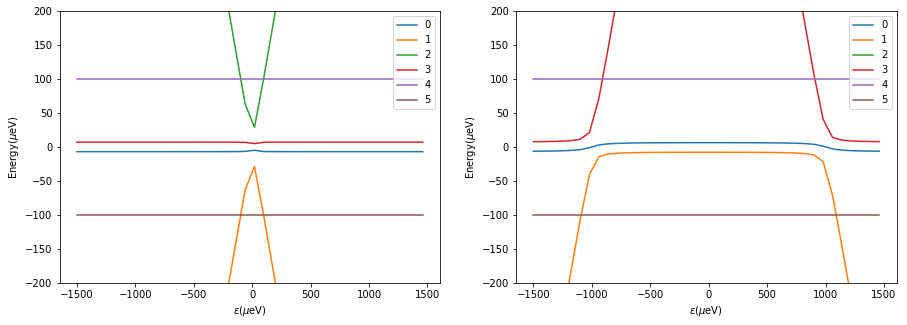

In [4]:
#Plot the eigenvalues
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 5])

ax0 = plt.subplot(gs[0])

for i in range(6):
    ax0.plot(erange,vals0[i,:],label=i) # each row contains a eigenalue as a function of detuning
plt.ylim([-200,200])
plt.legend()
plt.xlabel("$\epsilon(\mu$eV)")
plt.ylabel("Energy($\mu$eV)")


ax1 = plt.subplot(gs[1])
for i in range(6):
    ax1.plot(erange,vals1[i,:],label=i) # each row contains a eigenalue as a function of detuning
plt.ylim([-200,200])
plt.legend()
plt.xlabel("$\epsilon(\mu$eV)")
plt.ylabel("Energy($\mu$eV)")

plt.show()

$\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
The eigenvalues are returned in a random order so to check what state belongs to what eigenvalue, a known reference point needs to be used. Comparing this graph with [1] we see what states correspond to what eigenvalue: 5 = $\ket{\uparrow\uparrow}, 1 = \ket{\uparrow\downarrow}, 0 = \ket{\downarrow\uparrow}, 4 = \ket{\downarrow\downarrow}$

Now plotting the energy shift of the levels around $\epsilon = 0 $ with respect to their energy at $\epsilon = 0$

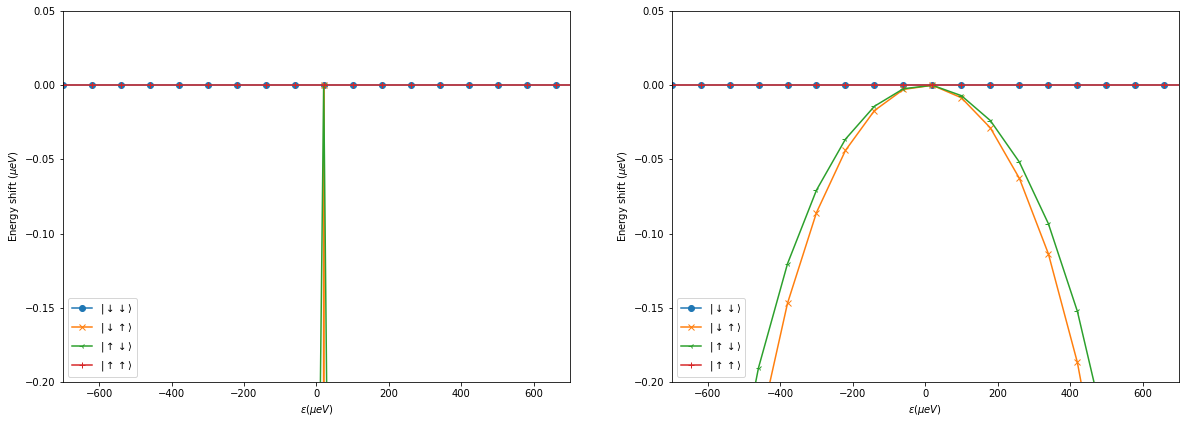

In [5]:
markers = ["o", "x","3","+"]
stat = [r'$|\downarrow\downarrow\rangle$',r'$|\downarrow\uparrow\rangle$',r'$|\uparrow\downarrow\rangle$',
        r'$|\uparrow\uparrow\rangle$', 'S(2,0)','S(0,2)']
fig = plt.figure(figsize=(20,15))
plt.subplot(221)
for i, state in enumerate([5,1,0,4]):
    plt.plot(erange,vals0[state,:]-vals0[state,np.argmin(abs(erange))],marker = markers[i],label=stat[i])
plt.ylim([-0.2,0.05])
plt.xlim([-700,700])
plt.ylabel("Energy shift ($\mu eV$)")
plt.xlabel("$\epsilon$($\mu eV$)")
plt.legend()
plt.subplot(222)
for i,state in enumerate([5,1,0,4]):
    plt.plot(erange,vals1[state,:]-vals1[state,np.argmin(abs(erange))],marker=markers[i],label=stat[i])
plt.ylim([-0.2,0.05])
plt.xlim([-700,700])
plt.ylabel("Energy shift ($\mu eV$)")
plt.xlabel("$\epsilon$($\mu eV$)")
plt.legend()
plt.show()

### Numerical calculation
Using the standard BLAS/LAPACK linear algebra package.



In [6]:
from scipy import linalg as la
def set_Hamiltonian(B1,B2,t,U1,U2,e):
    '''Initializes the two electron spin hamiltonian
    
       args:
           B1,B2,t,U1,U2,e (double): the energy terms.
           
       Returns:
           [6,6] array representing the Hamiltonian
    '''
    h = np.zeros((6,6))
    h[0,0]=-Ez
    h[1,1]=-dEz/2;h[1,4:6]=t
    h[2,2]=dEz/2;h[3,4:6]=-t
    h[3,3]=Ez
    h[4,1]=t;h[4,2]=-t;h[4,4] = U1+e
    h[5,1]=t;h[5,2]=-t;h[5,5]=U2-e
    return h


In [7]:
def eval_num0(B1,B2,t,U1,U2,erange):
    '''Calculates the eigenvalues of the Hamiltonian as a function of detuning
       Parameters:
           Ez,dEz,t,U: the energy terms.
           erange: the detuning energy range in list or 1D numpy array
       Returns:
            eig_vals [6,len(erange)] array where each row is an eigenvalue as a function of detuning
    '''
    eig_vals = np.zeros((6,len(erange)))
    for i, e in enumerate(erange):
        h = set_Hamiltonian(B1,B2,t,U1,U2,e)
        w, v = la.eigh(h)
        eig_vals[:,i]=w
    return eig_vals


In [8]:
Ez=100;dEz=14;t=10;U=1000;e=0;
B1=93;B2=107;t=10;U1=1000;U2=1000
erange = np.arange(-1500,1500,10)

eig_vals = eval_num0(B1,B2,t,U1,U2,erange)


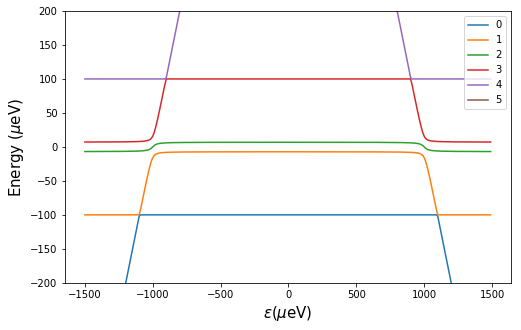

In [9]:
fig = plt.figure(figsize=(8,5))
for i in np.arange(6):
    plt.plot(erange,eig_vals[i,:],label = i)
plt.legend()
plt.xlabel("$\epsilon (\mu$eV)",fontsize=15)
plt.ylabel("Energy ($\mu$eV)",fontsize=15)

plt.ylim([-200,200])

plt.show()

The lin algebra package calculates the eigenvalues of a matrix and returns the eigenvalues in an ascending order ($E_i<E_{i+1}$) with a numpy array. 
\begin{align}
\begin{bmatrix}E_1 && E_2 && E_3 && E_4 && E_5 && E_6 \end{bmatrix}
\end{align}
If the value of an eigenvalue with respect to the other eigenvalues becomes larger or smaller then this array will order itself such that it is in ascending order again. So let's say $E_2$ becomes smaller than $E_1$ , $E_2<E_1$.
The returned array in this case is:
\begin{align}
\begin{bmatrix}E_2 && E_1 && E_3 && E_4 && E_5 && E_6 \end{bmatrix}
\end{align}
We can see this happening when the eigenvalue of state 0 initially is smaller than the eigenvalue of state 1 but at around $\epsilon = -1150$ the eigenvalue of state 0 becomes becomes larger than state 1, so the position in the 1D arrays swap resulting in a seemingly state swap.
To keep track of these swaps we keep track of the eigenvectors by indicating them with indices.

In [10]:


def eval_num(B1,B2,t,U1,U2,erange):
    '''Numerically calculates the eigenvalues of the [6,6] electron spin matrix
       
        Parameters:
           Ez,dEz,t,U: the energy terms.
           erange: the detuning energy range in list or 1D numpy array
           
        Returns:
            ([6,len(erange)],erange) tuple. First element contains the eigenvalues 
            where each row is an eigenvalue as a function of detuning. Second element is the detuning range.
    '''
    erange = erange.astype(float)
    H = set_Hamiltonian(B1,B2,t,U1,U2,erange[0])
    if len(erange)>=2 and np.any(erange==0): # algorithm doesn't work if erange contains 0 ?
        erange[np.where(erange==0)[0][0]] = 0.01
    w,v = la.eigh(H)
    v=np.abs(v)
    oud1=v[:,0] #eigenvectors of previous calculation
    oud2=v[:,1]
    oud3=v[:,2]
    oud4=v[:,3]
    oud5=v[:,4]
    oud6=v[:,5]
    e1=[] 
    e2=[]
    e3=[]
    e4=[]
    e5=[]
    e6=[]
    eig_vecs=[]
    Energy = np.zeros((6,len(erange)))
    time_begin=time.time()
    for i, e in enumerate(erange):
        H = set_Hamiltonian(B1,B2,t,U1,U2,e)
        w,v = la.eigh(H)
        v = np.abs(v)
        indx1=np.argmin(np.sum((v-oud1.reshape((6,1)))**2,axis=0)) #determine which new eigenvector v belongs to which old eigen-
        indx2=np.argmin(np.sum((v-oud2.reshape((6,1)))**2,axis=0)) #vector oud# by calculating for each new v the distance
        indx3=np.argmin(np.sum((v-oud3.reshape((6,1)))**2,axis=0)) #between v and each oud# eigenvector. Assuming that the small-
        indx4=np.argmin(np.sum((v-oud4.reshape((6,1)))**2,axis=0)) #est distance between v and oud# is the the same state.
        indx5=np.argmin(np.sum((v-oud5.reshape((6,1)))**2,axis=0))
        indx6=np.argmin(np.sum((v-oud6.reshape((6,1)))**2,axis=0))

        eig_vecs.append(v)
        #print(indx1+1,indx2+1,indx3+1,indx4+1,indx5+1,indx6+1)
        oud1=v[:,indx1]
        oud2=v[:,indx2]
        oud3=v[:,indx3]
        oud4=v[:,indx4]
        oud5=v[:,indx5]
        oud6=v[:,indx6]
        e1.append(w[indx1])
        e2.append(w[indx2])
        e3.append(w[indx3])
        e4.append(w[indx4])
        e5.append(w[indx5])
        e6.append(w[indx6])
        Energy[:,i] = w
    return np.array([e1,e2,e3,e4,e5,e6]),erange

In [11]:
Ez = 100; dEz = 14; t = 10; U = 1000;e=0;
B1=93;B2=107;t=10;U1=1000;U2=1000;e=0;
erange = np.arange(-1500,1500,6)
start = time.time()
eig_vals,erange = eval_num(B1,B2,t,U1,U2,erange)
print(np.around(time.time()-start,2), "s for %s data points" %(eig_vals.size))

0.06 s for 3000 data points


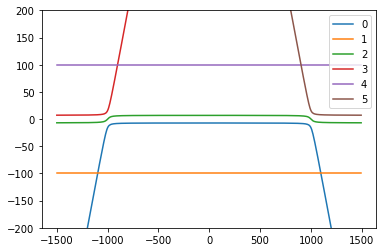

In [12]:
plt.figure()
for i in range(6):
    plt.plot(erange,eig_vals[i], label = i)

plt.ylim([-200,200])
plt.legend()
plt.show()

Note: We assumed that a small perturbation in the matrix leads to small perturbations in the eigenvectors. In general, this is not true at all. However we did use this assumption to keep track of the eigenvectors by comparing how much the eigenvectors changed after each eigenvalue calculation of matrix. 
This method will work if $\Delta\epsilon$ is small, e.g. if you set erange=np.arange(-1500,1500,\$\Delta\epsilon$=20), it will not work.

These functions are here just to visualize the energy diagram. You can make your own plots just using the results of the calculations.

In [13]:
def invert_eV(energy):
    """Converts energy in units of electronVolts to frequency
    
    args:
        energy (double): The energy in electronVolts
    
    returns:
        frequency (double): The energy in Hz
    """
    frequency = energy*eV/h
    return frequency
def convert_eV(frequency):
    """Converts energy in units of frequency to units of electronVolts
    
    args:
        energy (double): The energy in units of Hz
    
    returns:
        energy (double): The energy in untis of electronVolts
    """
    energy = frequency*h/eV
    return energy

def plot_energy_diagram(eigen_values,detuning_range):
    for i in range(6):
        plt.plot(convert_eV(detuning_range)*1e3,eigen_values[i,:]/1e6,label=i)
    #plt.ylim([-10000,10000])
    #plt.xlim([-4,4])
    plt.legend()
    plt.title("Symbolic solution")
    plt.xlabel("$\epsilon($meV)")
    plt.ylabel("Energy(MHz)")
    plt.show()

def plot_J_half(eigen_values,detuning_range,zero_point):
    stat = [r'$|\downarrow\downarrow\rangle$',r'$|\uparrow\downarrow\rangle$',r'$|\downarrow\uparrow\rangle$',
        r'$|\uparrow\uparrow\rangle$', 'S(2,0)','S(0,2)']
    plt.figure()
    for i, state in enumerate([1,2]):
        plt.plot(convert_eV(detuning_range_cphase)*1000,abs(eigen_values[state,:]-zero_point[state])/1e6,label=stat[state])
    plt.legend()
    plt.title('J/2')
    plt.xlabel('$\epsilon$ (meV)')
    plt.ylabel('Energy (MHz)')
    plt.ylim([-10,10])
    plt.show()   
def plot_J(eigen_values,detuning_range,zero_point):
    stat = [r'$|\downarrow\downarrow\rangle$',
            r'$|\uparrow\downarrow\rangle$',
            r'$|\downarrow\uparrow\rangle$',
        r'$|\uparrow\uparrow\rangle$', 'S(2,0)','S(0,2)']
    plt.figure()
    J = abs((eigen_values[1,:]-zero_point[1])/1e6)+\
    abs((eigen_values[2,:]-zero_point[2])/1e6)
    plt.plot(convert_eV(detuning_range)*1000,J,label = 'J')
    plt.legend()
    plt.title('Exchange energy J')
    plt.xlabel('$\epsilon$ (meV)')
    plt.ylabel('Energy (MHz)')
    plt.ylim([-10,10])
    plt.show()  
    return J


### Energy diagram using the parameteres of the Watson Paper

Let's start with the symbolic calculation

(note: the following plots are easier to examine when using a plot backend that allows for interactive plots, this can be done in Jupyter notebook by inserting the following code in the notebook(preferabbly where you import the packages): %matplotlib backend, for example "%matplotlib notebook" to use the notebook backend instead of the inline backend. If this does not work, it's also possible to download this notebook as a .py file and open it in spyder. Spyder allows for easy use of interactive plots.)

In [32]:
B1=18.4e9;B2=19.7e9;t=0.250e9;U1=invert_eV(3.5e-3);U2=invert_eV(3.5e-3);detuning_range=invert_eV(np.arange(-4,4,0.001)*1e-3)

#this calculation is in comments because I used a very high resolution which takes a really long time to calculate
#instead I've done the calculation and saved the data in a .csv file. The data is loaded in the next block.

#eigen_values = eval_calc(B1,B2,t,U1,U2,detuning_range) 

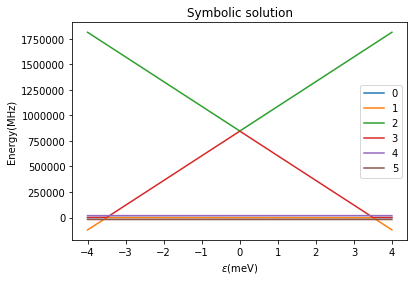

In [15]:
eigen_values = np.loadtxt('Symbolic_Energy_calc_watson.csv', comments = '#', delimiter = ',')
plt.figure()
for i in range(6):
    plt.plot(convert_eV(detuning_range)*1e3,eigen_values[i,:]/1e6,label=i)
#plt.ylim([-10000,10000])
#plt.xlim([-4,4])
plt.legend()
plt.title("Symbolic solution")
plt.xlabel("$\epsilon($meV)")
plt.ylabel("Energy(MHz)")
plt.show()


Here we use a generic numeric solution

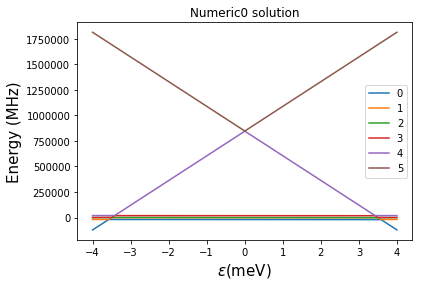

In [16]:
Ez=(B1+B2)/2;dEz=B1-B2;t=0.210e9;U=invert_eV(3.5e-3);e=0;

detuning_range_num0 = invert_eV(np.arange(-4,4,0.001)*1e-3)

eig_vals = eval_num0(B1,B2,t,U1,U2,detuning_range_num0)

plt.figure()
for i in np.arange(6):
    plt.plot(convert_eV(detuning_range_num0)*1000,eig_vals[i,:]/1e6,label = i)
plt.legend()
plt.title("Numeric0 solution")
plt.xlabel("$\epsilon ($meV)",fontsize=15)
plt.ylabel("Energy (MHz)",fontsize=15)

#plt.ylim([-2000,2000])

plt.show()

Here we use a generic numeric solution but where the colors of the state should be ordered.

In [17]:

Ez=(B1+B2)/2;dEz=B1-B2;t=0.210e9;U=invert_eV(3.5e-3);e=0;

detuning_range_num = invert_eV(np.arange(-4,4,0.0001)*1e-3)

start = time.time()
eig_vals,erange = eval_num(B1,B2,t,U1,U2,detuning_range_num)
print(np.around(time.time()-start,2), "s for %s data points" %(eig_vals.size))



8.05 s for 480000 data points


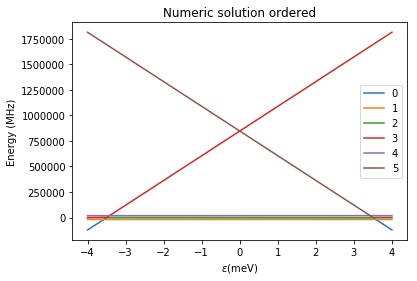

In [18]:
plt.figure()
for i in range(6):
    plt.plot(convert_eV(detuning_range_num)*1000, (eig_vals[i])/1e6, label = i)
plt.xlabel("$\epsilon$(meV)")
plt.ylabel("Energy (MHz)")
plt.title("Numeric solution ordered")
#plt.ylim([-2000,2000])
plt.legend()
plt.show()


### Calculating J
We will be using the data from the symbolic solution to calculate J.
First let's do a quick plot of the decrease of the antiparallel states due to the anti-crossing of S(0,2) and the antiparallel states $|01\rangle$ and $|10\rangle$ with an energy of $J(\epsilon)/2$

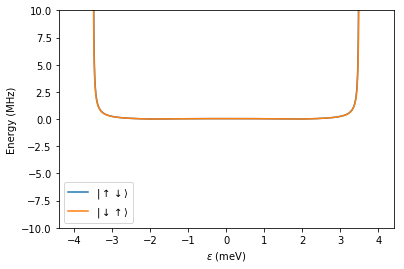

In [26]:
stat = [r'$|\downarrow\downarrow\rangle$',r'$|\uparrow\downarrow\rangle$',r'$|\downarrow\uparrow\rangle$',
        r'$|\uparrow\uparrow\rangle$', 'S(2,0)','S(0,2)']

#calculate the eigen values at exactly zero detuning
zero_point,v = la.eigh(set_Hamiltonian(B1,B2,t,U1,U2,0)) 

#eigen_values[state,np.argmin(abs(detuning_range))] this is the value of the eigenvalue closest to zero or zero if the detuning_range list contains a zero


plt.figure()

for i, state in enumerate([0,1]):
    plt.plot(convert_eV(detuning_range)*1000,abs((eigen_values[state,:]-np.flip(zero_point)[3+i])/1e6),label = stat[i+1])
plt.legend()
plt.xlabel('$\epsilon$ (meV)')
plt.ylabel('Energy (MHz)')
plt.ylim([-10,10])
plt.show()


Let's make a higher resolution plot around the S(0,2) regime (between $\epsilon =3 \text{meV} \text{ and } \epsilon = 4 \text{meV}$) so that we have a high resolution for $J(\epsilon)$

In [122]:
B1=18.4e9;B2=19.7e9;t=0.210e9;U1=850e9;U2=840e9;detuning_range_cphase=invert_eV(np.arange(3.3,3.6,0.0001)*1e-3)
eigen_values_for_cphase = eval_num0(B1,B2,t,U1,U2,detuning_range_cphase)

Plot the energy diagram:

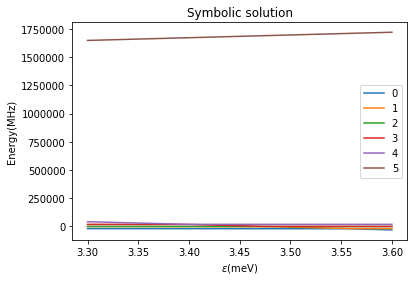

In [123]:
plot_energy_diagram(eigen_values_for_cphase,detuning_range_cphase)

Plot the decrease of the anti-parallel states:

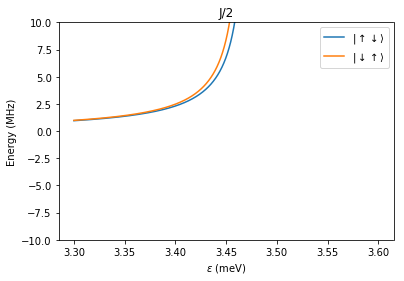

In [124]:
#calculate exact zero point
zero_point,v = la.eigh(set_Hamiltonian(B1,B2,t,U1,U2,e=0))

plot_J_half(eigen_values_for_cphase,detuning_range_cphase,zero_point)


Plot $J$ which is the sum of the two $J/2$

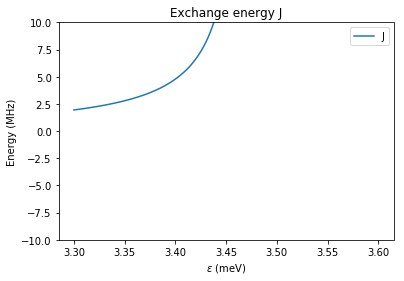

In [125]:
J = plot_J(eigen_values_for_cphase,detuning_range_cphase,zero_point)

Using an interactive plot you can now read off at what value of $\epsilon$ the exchange energy $J$ equals to $6$ MHz.

Or use the data to find at what index of J, J equals 6 MHz and use that index to find the corresponding detuning $\epsilon$.

In [126]:
detuning_cphase = detuning_range_cphase[np.argmin(abs(J-6))] #value of detuning in Hz
detuning_cphase_eV = convert_eV(detuning_cphase) #value of detuning in eV
print(detuning_cphase, ' Hz and ',detuning_cphase_eV, ' eV')

825646613506.6794  Hz and  0.003414600000000242  eV


This results in value of $\epsilon \approx 832\cdot10^9 \text{Hz}\approx 3.44$ meV